In [66]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [67]:
print(torch.__version__)

1.9.0


# 3.2.1 生成数据集

In [68]:
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.randn(num_examples,num_inputs,dtype=torch.float32)#features 是1000×2的矩阵
labels = true_w[0] * features[:,0] + true_w[1]*features[:,1]+true_b #y= w1*x1 + w1*x2 +b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)#噪声项 服从均值为0,标准差为0.01的正太分布

In [69]:
print(features[0], labels[0])

tensor([ 0.3693, -0.1969]) tensor(5.6281)


In [70]:
def use_svg_display():
    #用矢量图显示
    display.set_matplotlib_formats('svg')


In [71]:
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    #设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

# # 在../d2lzh_pytorch里面添加上面两个函数后就可以这样导入
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import *

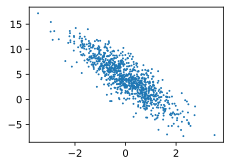

In [72]:
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1); #加分号只显示图

# 3.2.2 读取数据

模型训练是 需要不断遍历数聚集并不断读取批量数据样本

In [73]:
def data_iter(batch_size, features, labels):#返回 batch_size 个随机样本的特征和标签
    num_examples = len(features)#数据数量
    indices = list(range(num_examples))
    random.shuffle(indices)#样本的读取顺序是随机的
    for i in range(0,num_examples, batch_size):#从0开始，到num_examples,每次跳batch_size
        j = torch.LongTensor(indices[i:min(i+batch_size,num_examples)])#使用min函数是因为最后一次可能不足一个batch，不足则取剩下的
        yield features.index_select(0,j), labels.index_select(0,j)

In [74]:
batch_size = 10

for X,y in data_iter(batch_size, features, labels):
    print(X,'\n', y)
    break

tensor([[-0.5517,  0.9950],
        [-0.0119, -1.0189],
        [ 0.7137, -0.9725],
        [ 0.4486, -1.6717],
        [-0.3819,  0.7832],
        [-0.5743,  0.4882],
        [ 2.0796, -0.7936],
        [-0.4839, -0.9738],
        [-1.3885,  0.1635],
        [ 0.6843, -0.8965]]) 
 tensor([-0.2716,  7.6411,  8.9205, 10.7751,  0.7657,  1.3854, 11.0493,  6.5386,
         0.8666,  8.6208])


# 3.2.3 初始化模型参数

In [75]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype = torch.float32)#w初始化为均值为0,标准差为0.01的正态随机数
b = torch.zeros(1, dtype = torch.float32)#b 初始化为0 

In [76]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

# 3.2.4 定义模型

In [77]:
def linreg(X,w,b):#本函数已保存再d2lzh包中方便以后使用  线性回归模型
    return torch.mm(X,w)+b

# 3.2.5 定义损失函数

In [78]:
def squared_loss(y_hat,y):#本函数已保存再d2lzh包中方便以后使用
    return (y_hat-y.reshape(y_hat.shape))**2/2

# 3.2.6 定义优化算法

In [79]:
def sgd(params, lr, batch_size):#本函数已保存再d2lzh包中方便以后使用
    for param in params:
        param.data -= lr*param.grad/batch_size#注意这里更改parm时用的parm.data  梯度存在于grad中

# 3.2.7 训练模型

In [80]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):#训练模型一共需要num_epochs 个迭代周期
    #在每一个迭代周期中，会使用训练数据采集中所有样本一次(假设样本能够被批量大小整除)。 
    #X和y分别是小批量样本的特征和标签
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b), y).sum()#l 是有关小批量X和y的损失
        l.backward()#小批量的损失对模型参数求梯度
        sgd([w,b],lr,batch_size) #使用小批量随机梯度下降迭代模型参数
        
        #不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features,w,b), labels)
    print('epoch %d, loss %f' % (epoch+1,train_l.mean().item()))

epoch 1, loss 0.046233
epoch 2, loss 0.000202
epoch 3, loss 0.000051


In [82]:
print(true_w,'\n',w)
print(true_b,'\n',b)

[2, -3.4] 
 tensor([[ 2.0004],
        [-3.4008]], requires_grad=True)
4.2 
 tensor([4.1997], requires_grad=True)
